In [8]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9

# Метод максимального правдоподобия

Данный метод позволяет оценивать параметры распределения исходя из имеющихся наблюдений случайной величины. Правдоподобие показывает вероятность получения совокупности наблюдения при конкретных значениях параметров (гипотеза).

Хорошо, что дальше? А дальше, мы ищем ее максимум, то есть максимизируем вероятность получения выборки (ищем наиболее правдоподобный вид функции)

$$
\hat{\vec{\theta}} = \arg\max_{\vec{\theta}} L(\vec{\theta}|\mathbf{X})
$$

Байесов вывод начинает совпадать с методом максимального правдоподобия, если априорную вероятность выбрать равномерной.

При этом, __считается, что область наблюдений $X$ не зависит от параметров $\vec{\theta}$!__

## Оценка параметров нормального распределения в частотном подходе

Рассмотрим в качестве примера нормальное распределение. Функция правдоподобия в этом случае примет вид

$$
L(\vec{\theta}|\mathbf{X}) = \prod_{n=1}^N f(x_n|\vec{\theta}) = \prod_{n=1}^N \mathcal{N}(x_n | \mu, \sigma^2)
$$

Здесь удобно перейти к логарифмической функции правдоподобия

$$
\mathcal{L}(\mu, \sigma^2|\mathbf{X}) = - \frac{N}{2} \ln (2\pi\sigma^2) - \sum_{n=1}^N \frac{(x_n - \mu)^2}{2\sigma^2}  
$$

Здесь уже можно увидеть, что мы получили метод наименьших квадратов (если считать $\sigma$ известной).

Максимум функции мы будет искать стандартно - найдем производные и приравняем к нулю:

$$
\frac{\partial \mathcal{L}}{\partial \mu} = \sum_{n=1}^{N} \frac{x_n - \mu}{\sigma^2} = 0
\\
\Rightarrow
\\
\hat{\mu} = \frac{1}{N} \sum_{n=1}^{N} x_n
$$

Мы получили формулу, совпадающую с выборочным средним.

Проделаем тоже самое для дисперсии:

$$
\frac{\partial \mathcal{L}}{\partial \sigma^2} 
= - \frac{N}{2 \sigma^2}  + \sum_{n=1}^{N} \frac{(x_n - \mu)^2}{2\sigma^4} 
= 0
\\
\Rightarrow
\\
\hat{\sigma}^2 = \frac{1}{N} \sum_{n=1}^{N} (x_n - \mu)^2
$$

Она зависит от $\mu$, которое мы уже нашли. Подставим нашу оценку $\hat{\mu}$

$$
\hat{\sigma}^2 
= \frac{1}{N} \sum_{n=1}^{N} (x_n - \hat{\mu})^2
= \frac{1}{N} \sum_{n=1}^{N} \left(x_n - \frac{1}{N} \sum_{i=1}^{N} x_i \right)^2
= \frac{1}{N} \sum_{n=1}^{N} x_n^2 - \hat{\mu}^2
$$

Пока все точно также, как и в Байесовом подходе в случае равномерного распределения.

In [37]:
# Проверим теперь эти утверждения

from scipy.stats import norm

mean = 5
sigma2 = 2
# Здесь второй параметр - это стандартное отклонение, а не дисперсия
pdf = norm(mean, np.sqrt(sigma2))

samples = pdf.rvs(size=1000)

print("hat(Mean) =", samples.mean())
print("hat(Variance) =", samples.var())

hat(Mean) = 5.075021115735091
hat(Variance) = 2.1408991470493466


Но как было показано ранее, эти величины зависят от наших данных, которые являются случайной величиной

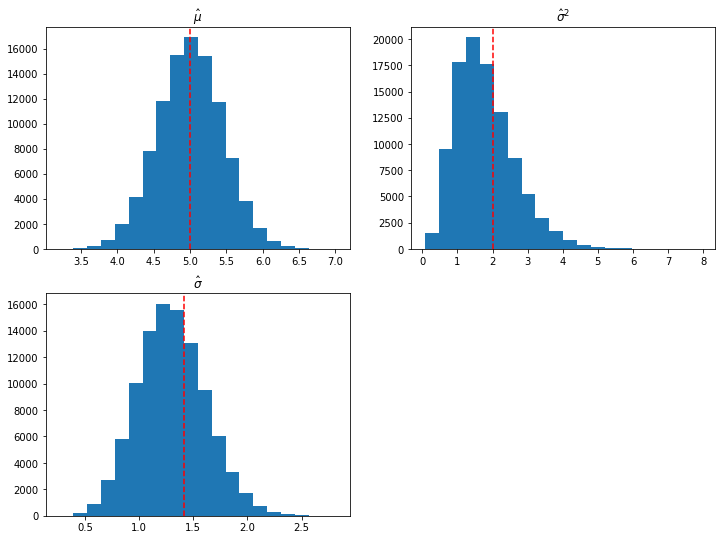

Mean[mu] = 5.001379785786863
Mean[sigma] = 1.3032883542987124
Mean[sigma2] = 1.795559842890717


In [38]:
# Попробуем повторить это множество раз

samples = pdf.rvs(size=(10, 100000))
h_means = samples.mean(axis=0)
h_sigma2s = samples.var(axis=0)
    
plt.subplot(221)
plt.title("$\hat{\mu}$")
plt.axvline(mean, c='r', ls='--')
plt.hist(h_means, bins=20)

plt.subplot(222)
plt.title("$\hat{\sigma}^2$")
plt.axvline(sigma2, c='r', ls='--')
plt.hist(h_sigma2s, bins=20)

plt.subplot(223)
plt.title("$\hat{\sigma}$")
plt.axvline(np.sqrt(sigma2), c='r', ls='--')
plt.hist(np.sqrt(h_sigma2s), bins=20)

plt.show()

print("Mean[mu] =", np.mean(h_means))
print("Mean[sigma] =", np.mean(np.sqrt(h_sigma2s)))
print("Mean[sigma2] =", np.mean(h_sigma2s))

Здесь мы сразу же видим несколько особенностей оценок с помощью метода максимального правдоподобия: они являются случайной величиной и они могут быть смещены. Хорошая новость - эти оценки всегда состоятельны.

* __Смещение (bias)__ - среднее отклонение от истинного значения параметра
<br><br>
$$
b[\hat{\mu}] = E[\hat{\mu} - \mu] = E[\hat{\mu}] - \mu
$$
Оценка называется несмещенной если $b = 0$.

* __Состоятельность__ - если многократно повторять оценки на разных последовательностях исходов, то в среднем они будут сходится к одному конкретному числу.
<br><br>
$$
E[\hat{\mu}] = \hat{\mu}_0
$$

Раз это случайные величины, то по идее мы можем определить характеристики этих случайных величин.

# Гипотезы

Любое утверждение касательно наблюдаемой случайной величины является гипотезой. Различают два вида гипотез
* Простая гипотеза - предположение о каком-то конкретном законе распределения (то есть все параметры считаются известными)
* Сложная гипотеза - предположение о том, что случайная величина принадлежит некому семейству распределений (есть незафиксированные параметры)

Обычно вводят гипотезу $H_0$ - некое простое утверждение. В противовес ей вводят гипотезу $H_1$ - противоположное утверждение. Для проверки гипотезы вводят некий критерий $\lambda$, согласно которому $H_0$ принимается или отвергается в пользу $H_1$. 

Критерий определяет критическую область значений $\mathbf{X}$, при которых мы отвергаем гипотезу $H_0$ в пользу $H_1$. Обозначим эту область $W$, Пространство всех возможных значений $\mathbf{X}$ будем обозначать $\Omega$. Следовательно область $\Omega - W$ - это допустимая область, где гипотеза $H_0$ не может быть отвергнута.

Размер критической области обычно подбирается таким образом, чтобы вероятность попадания критерия в эту область равнялась желаемому уровню значимости

$$
P(\lambda \subset W | H_0) = \alpha 
$$

Фактически, $\alpha$ определяет вероятность того, что мы отвергаем гипотезу, когда она верна. Это называется ошибкой первого рода.

При этом вероятность попадания критерия в допустимую область в случае предположения гипотезы $H_1$, называются мощностью критерия

$$
P(\Lambda \subset W| H_1) = 1 - \beta
$$

Данная величина показывает вероятность ошибки, в случае принятия гипотезы $H_0$, в то время как верна гипотеза $H_1$. Это называется ошибкой второго рода. 

В общем случае, критическая область не единственна. Очевидным решением будет является выбрать такую критическую область, для которой $\beta$ минимально, что эквивалентно максимальной мощности.

## Пример

Или простым языком на примере. Мы просто выделяем  интервал, в который попадают $1-\alpha$ значений нашей статистики. А значит, что если мы будем отказываться от нашей гипотезы при попадании статистики вне этого интервала, то мы будем ошибаться всего лишь в $\alpha$ процентах случаях.

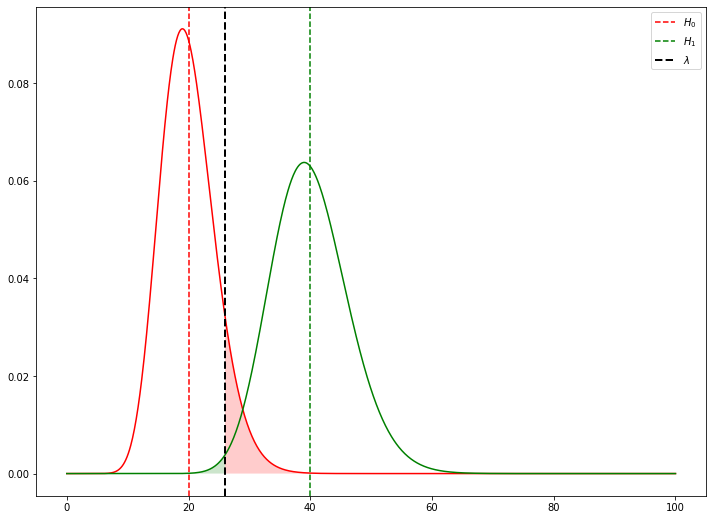

In [9]:
from scipy.stats import gamma
import numpy as np

# Просто отрисовка распределения в зависимости от гипотезы
def Hypo(m, m0, label, xmin=0, xmax=100, fc='g'):
    x = np.linspace(xmin, xmax, 1000)
    f = gamma(m)
    plt.plot(x, f.pdf(x), c=fc)
    
    if m0 > 0:
        xs = np.linspace(m0, xmax, 1000)
    else:
        xs = np.linspace(xmin, -m0, 1000)
        
    plt.axvline(m, c=fc, ls='--', label=label)
    plt.fill(np.concatenate([xs, xs[::-1]]),
         np.concatenate([f.pdf(xs), np.zeros(xs.shape)]),
         alpha=.2, fc=fc)
    
m0 = 26
Hypo(20, m0, "$H_0$", fc='r')
Hypo(40, -m0, "$H_1$", fc='g')
plt.axvline(m0, c='k', ls='--', lw=2, label="$\lambda$");
plt.legend()
plt.show()

Здесь зеленая область - это $\alpha$, ошибка первого рода. Мы отказываемся от верности нашей гипотезы, хотя она и верна. Красная область - это $\beta$, ошибка второго рода. В этом случае мы можем в $\beta$ процентах случаев принять случайно альтернативную гипотезу, если она верна.

# P-value

В настоящее время наряду с пороговым значением критерия вводят так называемое $P$-value, которое является просто вероятностью встретить значение критерия больше наблюдаемого (для случая одностороннего критерия)

$$
P(k > k_{obs}) = \int_{k_{obs}}^{\infty} f(k)\,dk
$$

Таким образом, если $P$-value меньше, чем $\alpha$, то мы вынуждены отвергнуть нулевую гипотезу. Нередко $P$-value указывают в $Z$ масштабе, т.е. в квантилях нормального распределения.

In [10]:
# Перевод вероятностей в сигма
def toZ(P):
    from scipy.special import erfinv
    return np.sqrt(2) * erfinv(1 - P)

P-value = 0.02187346844139093
Z = 2.292557936021306


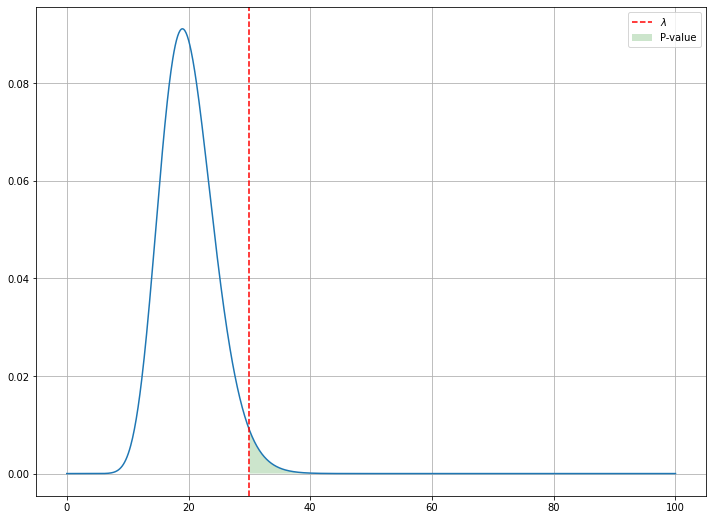

In [11]:
x = np.linspace(0, 100, 1000)
f = gamma(20)
plt.plot(x, f.pdf(x))

a = 30

print("P-value =", 1 - f.cdf(a))
print("Z =", toZ(1 - f.cdf(a)))
xs = np.linspace(a, x.max(), 1000)
    
plt.axvline(a, c='r', ls='--', label="$\lambda$")
plt.fill(np.concatenate([xs, xs[::-1]]),
     np.concatenate([f.pdf(xs), np.zeros(xs.shape)]),
     alpha=.2, fc='g', label="P-value")
plt.grid()
plt.legend()
plt.show()

# Критерий согласия $\chi^2$

Предположим, что наши данные распределены по некому известному закону $P(x)$. Это будет нашей нулевой простой гипотезой. Противоположной гипотезой будет выступать предположение, что данные получены из любого другого распределения.

Рассмотрим случайную величину $x$, которая может принимать $K$ значений: $x_1, \ldots, x_K$. Для непрерывной случайной величины мы можем ввести интервалы, попадание в которые мы будем считать исходом, т.е. перейдем от непрерывной величины к дискретной.

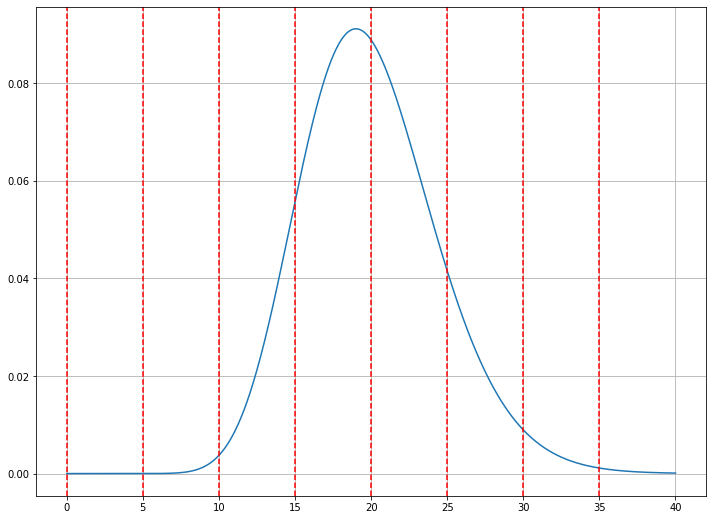

In [13]:
x = np.linspace(0, 40, 1000)
f = gamma(20)
plt.plot(x, f.pdf(x));
for xv in np.arange(0, x.max(), 5):
    plt.axvline(xv, ls='--', c='r')
plt.grid()

Введем вектор $\vec{\theta}$, компоненты которого $\theta_k = 1$ если $x = x_k$ и $\theta_k = 0$ во всех остальных случаях. 

Например, если $x$ результат броска игральной кости, то если выпало 2

$$
\vec{\theta}(x = 2) = (0, 1, 0, 0, 0, 0)^T 
$$

Таким образом $\vec{\theta}$ является многомерной случайной величиной (обобщение испытания Бернули), для которой имеет место

$$
\sum_k \theta_k = 1
$$

Все это мы записали для одного исхода. В общем случае множества исходов, мы можем ввести матрицу $\mathbf{\Theta}$, записывая $\vec{\theta}$ для исходов в столбцы этой матрицы.

$$
\mathbf{\Theta} = (\vec{\theta}_1, \ldots, \vec{\theta}_N)
$$

Полную частоту появления какого-то значения случайной величины мы можем получить просуммировав по всем исходам

$$
r_k = \sum_n \theta_{kn}
$$

Мы только что изобрели гистограмму. Если внимательно смотреть на $\vec{r}$, то можно понять что мы фактически получили величину распределенную по полиномиальному закону

$$
P(\vec{r}) = \frac{N!}{r_1!r_2!\ldots r_K!} p_1^{r_1} p_2^{r_2} \ldots p_K^{r_K}
\\
\sum_k r_k = N
\\
P(x = x_k) = p_k
$$

В предельном случае, распределение в каждом бине становится распределением Пуассона.

Если исходов довольно много, то $\vec{r}$ является суммой довольно большого числа случайных величин, что по идее указывает на то, что можно воспользоваться центральной предельной теоремой (в случае $Np_k > 4$), что дает 

$$
r_k \sim \mathcal{N}(r_k| \mu = Np_k, \sigma^2 = Np_k)
$$

А значит, величина в рамках гипотезы $H_0$

$$
z_k = \frac{r_k - N p_k}{\sqrt{N p_k}}
$$

распределена по $\mathcal{N}(z_k | 0, 1)$

Отсюда сумма квадратов $z_k$

$$
\chi^2_\nu = \sum_k z_k^2 = \sum_k \frac{(r_k - N p_k)^2}{N p_k}
$$

распределена как хи-квадрат с неким число степеней свободы.

Число степеней свободы мы определяем как 

$$
\nu = K - 1 - t
$$

где $t$ - это число параметров, которые будут оцениваться на основе представленных данных. (-1) возникает из-за того, что у нас есть уже одно ограничение, связывающее наши данные $\sum_k r_k = N$. Оценки параметров приведут к тому же самому - будут связывать наши данные.

# Пример 

Приведем классический пример использования критерия согласия $\chi^2$.

У нас есть данные за 20 лет о числе погибших офицеров в результате гибели под ними коня. Данные основаны на ежегодных отчетах десяти армейский корпусов.


| Число погибших офицеров, $x$  | Число донесений $r_x$ с количеством погибших офицеров $x$ |
| ----------------------------- | --------------------------------------------------------- |
| 0          | 109                   |
| 1          | 65                   |
| 2          | 22                   |
| 3          | 3                   |
| 4          | 1 |
| 5          | 0 |
| 6          | 0 |
| Всего          | 200                  |

Предположим, что наши данные распределены по Пуассону со средним, которое мы оценим из наших данных. Это и будет нашей гипотезой $H_0$.

In [42]:
r = np.array([109, 65, 22, 3, 1, 0, 0])
x = np.array([0, 1, 2, 3, 4, 5, 6])
N = r.sum()

# Посчитаем количество смертей
corpses = (r * x).sum()

print("Corpses = ", corpses)

# Наилучшая оценка среднего из них по методу максимального правдоподобия
m = corpses / N

print("Mean = ", m)

Corpses =  122
Mean =  0.61


In [44]:
from scipy.stats import poisson

pdf = poisson(m)

# Посчитаем наиболее вероятное количество смертей исходя из этой оценки - N p_i
# Слева оценка из гипотезы, справа то, что получено из наблюдений(отчеты)
for xv in x:
    print("[%3d] = %7.3f      Obs[%3d] = %7.3f" % (xv, N * pdf.pmf(xv), xv, r[xv]))

[  0] = 108.670      Obs[  0] = 109.000
[  1] =  66.289      Obs[  1] =  65.000
[  2] =  20.218      Obs[  2] =  22.000
[  3] =   4.111      Obs[  3] =   3.000
[  4] =   0.627      Obs[  4] =   1.000
[  5] =   0.076      Obs[  5] =   0.000
[  6] =   0.008      Obs[  6] =   0.000


In [45]:
# Считаем хи-квадрат

Npi = N * pdf.pmf(x)

u = ((r - Npi)**2 / Npi).sum()

print("U = ", u)

U =  0.7896272973000209


Хорошо, мы посчитали $u$, но что нам делать дальше? Если мы считаем нашу гипотезу верной, то в рамках этой гипотезы данная величина будет распределена как $\chi^2$ c $(7 - 1 - 1 = 5)$ степенью свободы. 

ChiMax = 15.08627246938899
P-value = 0.9776902240742161
Z = 0.02796480202700276


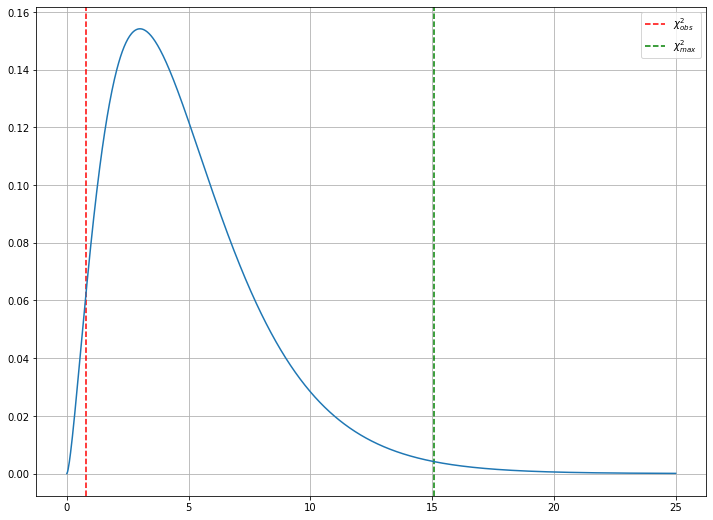

In [46]:
from scipy.stats import chi2

alpha = 0.01
xvs = np.linspace(0, 25, 1000)

# Определяем максимальное значение для хи-квадрата для заданной вероятности
df = 7 - 1 - 1
chiMax = chi2.ppf(1 - alpha, df)
print("ChiMax =", chiMax)
print("P-value =", 1 - chi2.cdf(u, df))
print("Z =", toZ(1 - chi2.cdf(u, df)))

plt.axvline(u, c='r', ls='--', label="$\chi_{obs}^2$")
plt.axvline(chiMax, c='g', ls='--', label="$\chi_{max}^2$")
plt.plot(xvs, chi2.pdf(xvs, df));
plt.grid()
plt.legend()
plt.show()

Выберем уровень значимости $\alpha = 0.01$.

Здесь мы нашли, что вероятность получения $u$ в интервале $[0, 15.08]$ равна 99%. Наше значение находится в этом интервале, а значит отвергнуть данную гипотезу мы не можем. Тут стоит отметить, что это не означает верность нашей гипотезы, мы просто от нее отказаться не можем. Вместе с ней мы можем предлагать новые гипотезы.

Если бы мы получили значение выше этого, то могли сказать, что наша гипотеза не верна и ошиблись бы при этом в худщем случае в 1% случаев.

## Замечание

Данный критерий плохо работает для редких событий. Для этого их объединяют в одно значение.

| Число погибших офицеров, $x$  | Число донесений $r_x$ с количеством погибших офицеров $x$ |
| ----------------------------- | --------------------------------------------------------- |
| 0          | 109                   |
| 1          | 65                   |
| 2          | 22                   |
| >=3          | 4                   |
| Всего          | 200                  |

U =  0.3235235766087142
ChiMax = 9.21034037197618
P-value = 0.8506438137125903
Z = 0.18829702964083475


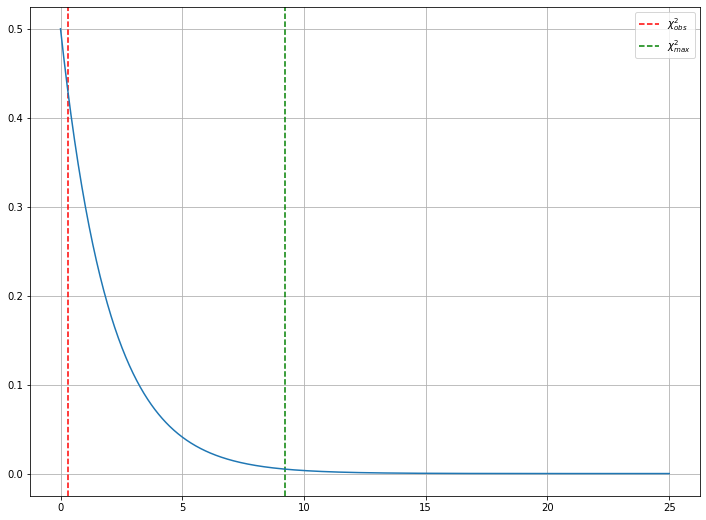

In [47]:
r = np.array([109, 65, 22, 4])
x = np.array([0, 1, 2, 3])
N = r.sum()

# Мы его уже посчитали
m =  0.61

pdf = poisson(m)
Npi = N * pdf.pmf(x)
# Здесь последнее число неправильно написано, поэтому 
# считаем отдельно
Npi[-1] = N * (1 - pdf.cdf(x[-2]))

u = ((r - Npi)**2 / Npi).sum()

print("U = ", u)

from scipy.stats import chi2

alpha = 0.01
xvs = np.linspace(0, 25, 1000)

# Определяем максимальное значение для хи-квадрата для заданной вероятности
# df = 4 - 1 - 1 = 2
df = 4 - 1 - 1
chiMax = chi2.ppf(1 - alpha, df)
print("ChiMax =", chiMax)
print("P-value =", 1 - chi2.cdf(u, df))
print("Z =", toZ(1 - chi2.cdf(u, df)))

plt.axvline(u, c='r', ls='--', label="$\chi_{obs}^2$")
plt.axvline(chiMax, c='g', ls='--', label="$\chi_{max}^2$")
plt.plot(xvs, chi2.pdf(xvs, df));
plt.grid()
plt.legend()
plt.show()

## Мнемоническое правило

Иногда можно пользоваться мнемоническим правилом определения точности на глаз. Можно увидеть, что если мы перейдем к распределения $\frac{\chi^2_{\nu}}{\nu}$, то можно увидеть, что в среднем вероятность получить значения этой величины больше 1 будет около 40% - 45%. При одной степени свободы - это практически совпадает с вероятностью $1\sigma$.

  1 => 0.32
  2 => 0.37
  3 => 0.39
  4 => 0.41
  5 => 0.42
  6 => 0.42
  7 => 0.43
  8 => 0.43
  9 => 0.44
 10 => 0.44
 15 => 0.45


(0.0, 0.1)

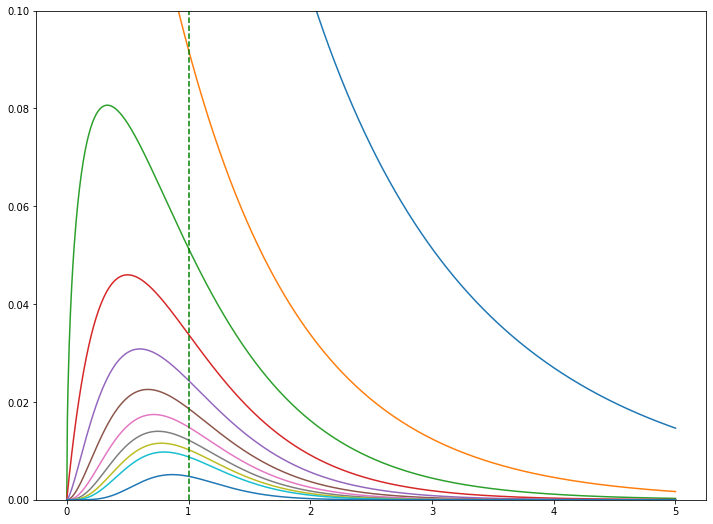

In [49]:
from scipy.stats import chi2

x = np.linspace(0, 5, 1000)

for df in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]:
    y = chi2.pdf(x*df, df) / df
    print("%3d" % df, "=>", "%.2f" % (1 - chi2.cdf(df, df)))
    plt.plot(x, y)
    
plt.axvline(1, ls="--", c='g')
plt.ylim(0, 0.1)

# Доверительный интервал в частотном выводе

Доверительный интервал в частотном подходе записывается также, но несет в себе совершенно другой смысл. На английском языке этот интервал называют __confidence interval__.

Помним, что в этом подходе значения параметров фиксированы, просто они нам не известны. А это значит, что говорить о вероятности попадания значения данного параметра в фиксированный интервал не имеет смысла. Мы либо попали (тогда вероятность 100%), либо не попали (в этом случае 0%). 

То есть мы не можем говорить, что истинное значение параметра находится в этом интервале с какой-то вероятностью.

Что же тогда значит доверительный интервал в этом подходе?

На самом деле, доверительный интервал означает следующее:
> Если мы будем повторять эксперимент множество раз, и для каждого эксперимента мы будем строить свой доверительный интервал, то в $p$ процентах случаев этот интервал накроет истинное значение параметра. 

Таким образом, истинное значение параметра действительно остается константой (хоть и неизвестной нам), а вот границы интервала $\theta_l(\theta)$ и $\theta_u(\theta)$ становятся случайной величиной.

Попробуем в этом разобраться по шагам на примере нормального распределения. Мы уже знаем, что оценка среднего $\hat{\mu}$ (статистика) распределена по нормальному закону $\mathcal{N}\left(\mu, \frac{\sigma^2}{N}\right)$. То есть у нас есть распределение нашей статистики для различных гипотез среднего значения.

Таким образом мы можем посчитать вероятность получения любого значения $\hat{\mu}$. Тут есть большая проблема, на практике, мы обычно никогда не знаем истинного значения параметров распределения. 

Что мы тут можем сделать? Можем посмотреть максимально допустимое отклонение от реального значения параметра, после которого вероятность увидеть какое-либо конкретное значение $\hat{\mu}$ становится меньше наперед заданного $\alpha$.

$$
P(\mu_l \le \hat{\mu} \le \mu_u) = 1 - \alpha
$$

И так, у нас есть

$$
P(\hat{\mu} | \mu) = \mathcal{N}\left(\hat{\mu} \,\middle|\, \mu, \frac{\sigma^2}{N}\right)
$$

Будем считать, что $\sigma^2$ у нас задано. Тогда мы можем построить распределение для $\hat{\mu}$.

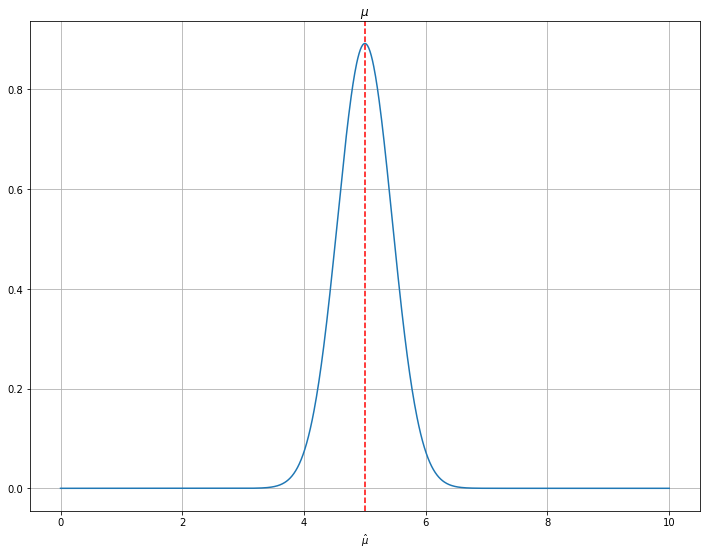

In [16]:
from scipy.stats import norm

# напомним, как выглядит распределение для оценки среднего при каком-то заданном значении

mu = 5
sigma = np.sqrt(2/10)

x = np.linspace(0, 10, 1000)
plt.title("${\mu}$")
plt.xlabel("$\hat{\mu}$")
plt.plot(x, norm.pdf(x, mu, sigma))
plt.axvline(5, c='r', ls='--')
plt.grid()
plt.show()

Выберим какой-то уровень $\alpha$, пусть это будет 31.7% (то есть $1-\alpha$ = 68.3%). Это соответсвует отклонению в $1\sigma$. В данном контксте этот уровень будет определять нам область в распределение куда должен попасть $\hat{\mu}$ с заданной вероятностью:

$$
P( |\mu - \hat{\mu}| \le k_\alpha ) = 1 - \alpha
\\
P( |\mu - \hat{\mu}| > k_\alpha ) = \alpha
$$

Таким образом, $k_\alpha$ - определяет некую границу, максимальной допустимое отклонение для какого-то конкретного значения $\mu$.

На рисунке ниже зеленная область обозначает интервал, внутри которого мы будет с вероятностью $1-\alpha$ получать нашу оценку, то есть в области, где отклонение меньше $k_\alpha$.

Красная область - это область, где отклонение больше $k_\alpha$.

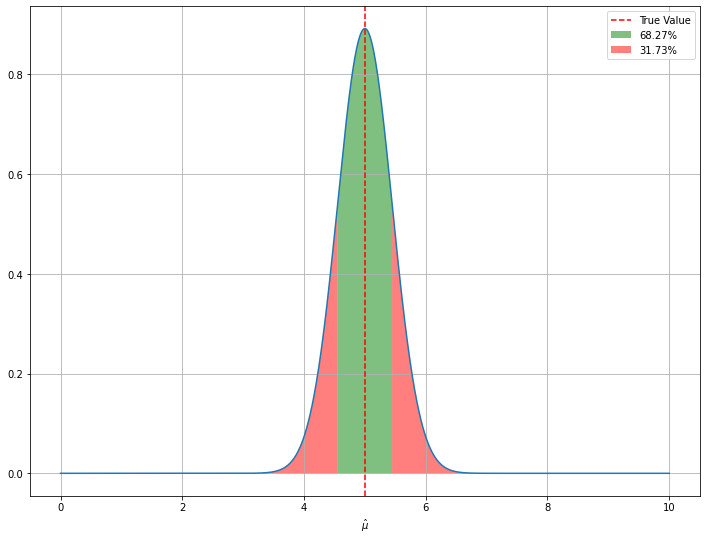

In [30]:
z = 1
p = norm.cdf(mu + z * sigma, mu, sigma) - norm.cdf(mu - z * sigma, mu, sigma)

x1s = np.linspace(mu - z * sigma, mu + z * sigma, 1000)
plt.xlabel("$\hat{\mu}$")

x1l = np.linspace(x.min(), x1s.min(), 1000)
x1r = np.linspace(x1s.max(), x.max(), 1000)

plt.fill(np.concatenate([x1s, x1s[::-1]]),
         np.concatenate([norm.pdf(x1s, mu, sigma), np.zeros(x1s.shape)]),
         alpha=.5, fc='g', label="%.2f%%" % (p*100))

plt.fill(np.concatenate([x1l, x1l[::-1]]),
         np.concatenate([norm.pdf(x1l, mu, sigma), np.zeros(x1l.shape)]),
         alpha=.5, fc='r', label="%.2f%%" % ( (1-p) * 100 ) )

plt.fill(np.concatenate([x1r, x1r[::-1]]),
         np.concatenate([norm.pdf(x1r, mu, sigma), np.zeros(x1r.shape)]),
         alpha=.5, fc='r')

plt.plot(x, norm.pdf(x, 5, np.sqrt(2/10)))
plt.axvline(5, c='r', ls='--', label="True Value")
plt.legend()
plt.grid()
plt.show()

И так, мы теперь можем сразу определить для любой оценки $\hat{\mu}$, в какую область (зеленую или красную) она попадает для любого значения $\mu$. 
Какой же смысл у эти областей? 

Сделаем предположение-гипотезу о том, что истинное значение $\mu$ принимает какое-то конкретное значение, то есть $\mu = \mu_0$. И в противовес этому выдвинем другую гипотезу $\mu \ne \mu_0$.

Теперь будем делать следующее, будем считать, что если $\hat{\mu}$ пападает в зеленную область, то оно получено из распределения с $\mu = \mu_0$ (наша первая гипотеза верная), Если попало в красную область - $\hat{\mu}$ получено из распределения с любым другим $\mu$ (вторая гипотеза верна). 

Допустим, мы получили большое значение $\hat{\mu}$ (оно попадает в красную область), следовательно - мы говорим, что вторая гипотеза верна. Но что если мы неправы и на самом деле первая гипотеза была верна? Мы будем ошибаться в худшем случае в $\alpha$ процентах случаев. Следовательно $\alpha$ определяет допустимый для нас уровень ошибки.

Теперь ничего нам не мешает определить все множество гипотез с $\mu$, для которых полученное значение $\hat{\mu}$ попадает в зеленую область. Предположим, что мы получили $\hat{\mu}_{obs} = 6$. Посмотрим, как ведут себя гипотезы по отношению к этому значению.

In [50]:
from ipywidgets import interact, interactive, fixed, interact_manual
from scipy.stats import norm

x = np.linspace(0, 10, 1000)

def Figure(mu=5, alpha=0.317):
    f = norm(mu, np.sqrt(2/10))
    x1s = np.linspace(f.ppf(alpha/2), f.ppf(1-alpha/2), 100)
    x1l = np.linspace(x.min(), f.ppf(alpha/2), 100)
    x1r = np.linspace(f.ppf(1-alpha/2), x.max(), 100)

    plt.fill(np.concatenate([x1s, x1s[::-1]]),
             np.concatenate([f.pdf(x1s), np.zeros(x1s.shape)]),
             alpha=.5, fc='g', label="%.2f%%" % (100 - 100*alpha))

    plt.fill(np.concatenate([x1l, x1l[::-1]]),
             np.concatenate([f.pdf(x1l), np.zeros(x1l.shape)]),
             alpha=.5, fc='r', label="%.2f%%" % (100*alpha))

    plt.fill(np.concatenate([x1r, x1r[::-1]]),
             np.concatenate([f.pdf(x1r), np.zeros(x1r.shape)]),
             alpha=.5, fc='r')

    plt.plot(x, f.pdf(x), 'b-')
    #plt.axvline(5, c='r', ls='--', label="True Value")
    plt.axvline(mu, c='m', ls='--', label="Hypothesis")
    plt.axvline(6, c='k', ls='--', label="$\hat{\mu}_{obs}$")
    plt.legend()
    plt.grid()
    plt.show()
    return

interactive_plot = interactive(Figure, mu=(x.min(), x.max(), 0.05), alpha=(0.05, 0.95, 0.05))
output = interactive_plot.children[-1]
output.layout.height = '600px'
interactive_plot

interactive(children=(FloatSlider(value=5.0, description='mu', max=10.0, step=0.05), FloatSlider(value=0.317, …

Поэкспериментировав с гипотезами, можно увидеть, что мы допускам гипотезы от $\hat{\mu}_{obs} - \sigma_x$ и до $\hat{\mu}_{obs} + \sigma_x$. Этот интервал и формирует нам доверительный интервал вокруг нашей оценки.

Это предельное отклонение и формирует нам доверительный интервал вокруг нашей оценки, давая нам информацию о том, какие гипотезы мы не можем отвергнуть с заданным уровнем $\alpha$. 

В пределе, если мы будем строить множество таких интервалов (а они случайная величина, как мы видим), то эти интервалы накроют истинное значение в $1-\alpha$ случаев.

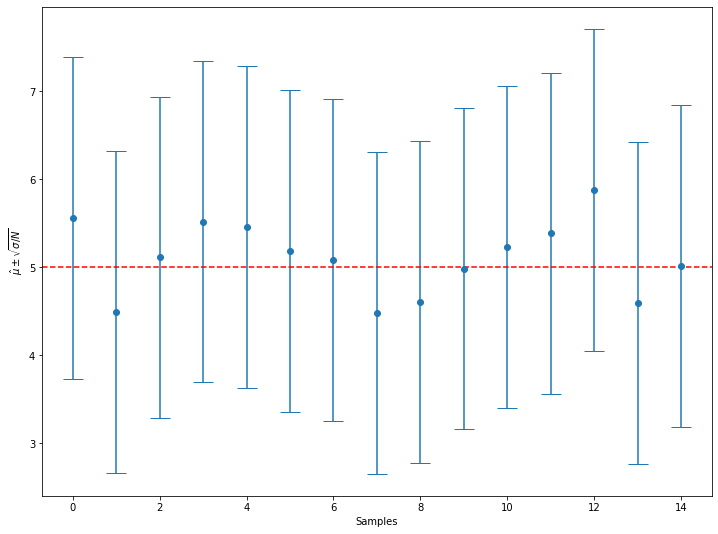

P = 0.68276


In [51]:
# Давайте посмотрим, как это выглядит

N = 15
y = h_means[:N]
n = [i for i in range(y.shape[0])]

plt.ylabel("$\hat{\mu} \pm \sqrt{\sigma/N}$")
plt.xlabel("Samples")
plt.errorbar(n, y, 5*np.sqrt(sigma2/N), fmt="o", capsize=10)
plt.axhline(5, c="r", ls='--')
plt.show()

# Затем посчитаем вероятность того, что в этот интервал накроет истинное значение
counter = 0
for m in h_means:
    if (m - 5)**2 <= sigma2/10:
        counter += 1
        
print("P =", counter / h_means.shape[0])

В итоге, мы получили ожидаемоую вероятность покрытия интервалом истинного значения.

Но у нас все еще есть проблема, нам чтобы расчитать доверительный интервал нужно знать истинное значение параметра.

# Наглядные примеры

https://seeing-theory.brown.edu/frequentist-inference/index.html

## Приближенное решение для доверительного интервала

Мы можем разложить логарифмическую функцию правдоподобия в окрестности её максимума

$$
\ln L(\theta| \mathbf{X}) = \ln L(\hat{\theta}|\mathbf{X}) + \frac{1}{2} \left.\frac{\partial^2 \ln L}{\partial \theta^2}\right|_{\theta=\hat{\theta}} (\theta - \hat{\theta})^2 + \ldots
$$

Член разложения соответствующий $(\hat{\theta} - \theta)$ очевидно равен 0 (условие максимума). Если оставить члены до второй степени включительно, то мы фактически пытаемся приблизить правдоподобие параболлой, которая соответствует нормальному распределению. В случае нескольких переменных, мы получим просто многомерное нормальное распределение.

Раз мы теперь знаем, что это приближенный Гаусс, то сразу же можем попробовать определить область, куда попадает $x$ с вероятностью $1-\alpha$. Для уровня в $1\sigma$ мы увидим, что показатель экспоненты равен $-\frac{1}{2}$. А значит мы можем посмотреть на область, которая ограничена этим уровнем.

Рассмотрим простой Гаусс с известным $\sigma^2$

$$
\ln L(\mu) = const - \frac{1}{2\sigma^2} \sum_n (x_n - \mu)^2
\\
\frac{\partial \ln L}{\partial \mu} = \frac{1}{\sigma^2} \sum_n (x_n - \mu)
\\
\frac{\partial^2 \ln L}{\partial \mu^2} = -\frac{N}{\sigma^2} 
\\
\hat{\mu} = \frac{1}{N} \sum_n x_n
$$

Отсюда (здесь формула точная)

$$
\ln L = \ln L(\hat{\mu}) - \frac{N}{2\sigma^2} (\mu - \hat{\mu})^2
\\
\ln \left(\frac{ L(\mu)}{L(\hat{\mu})} \right) = - \frac{N}{2\sigma^2} (\mu - \hat{\mu})^2
$$

Уровень экспонеты в $-\frac{1}{2}$

$$
\frac{N}{2\sigma^2} (\mu - \hat{\mu})^2 = \frac{1}{2}
\\
(\mu - \hat{\mu})^2 = \frac{\sigma^2}{N}
\\
\mu = \hat{\mu} \pm \frac{\sigma}{\sqrt{N}}
$$

Что опять таки совпадает с известным нам результатом. В общем случае, это будет просто давать разумное приближение. При этом мы можем выбрать и другой уровень, например -2 будет соответстсовать $2\sigma$, а -9/2 будет соответствовать $3\sigma$.

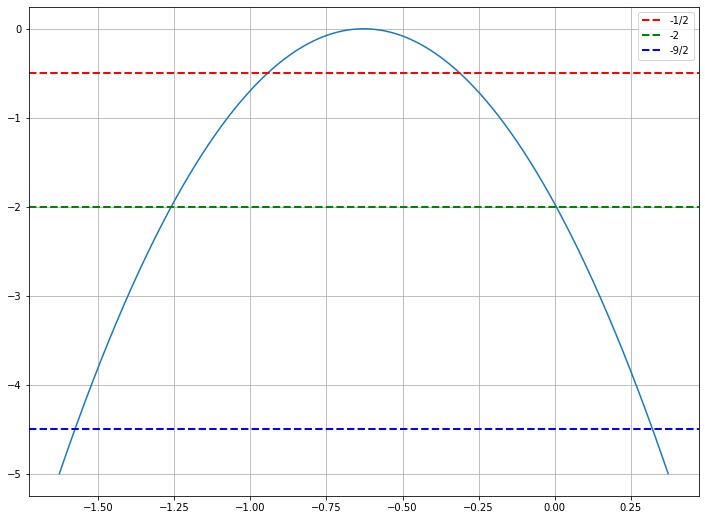

In [199]:
from scipy.stats import norm

N = 10
samples = norm.rvs(size = N)

mean = samples.mean()

mu = np.linspace(mean-1, mean+1, 1000)
lnL = -N / 2 * (mu - mean)**2

plt.grid()
plt.plot(mu, lnL)
plt.axhline(-1/2, c='r', lw=2, ls='--', label="-1/2")
plt.axhline(-2, c='g', lw=2, ls='--', label="-2")
plt.axhline(-9/2, c='b', lw=2, ls='--', label="-9/2")
plt.legend()
plt.show()

В случае нескольких параметров - это будет многомерный эллипс.